In [7]:
import os
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import re 
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML

df = pd.read_csv('../books.csv', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [11]:
print(df.head(10))

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       3  Harry Potter and the Sorcerer's Stone (Harry P...   
3       4  Harry Potter and the Chamber of Secrets (Harry...   
4       5  Harry Potter and the Prisoner of Azkaban (Harr...   
5       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
6       9  Unauthorized Harry Potter Book Seven News: "Ha...   
7      10       Harry Potter Collection (Harry Potter  #1-6)   
8      12  The Ultimate Hitchhiker's Guide: Five Complete...   
9      13      The Ultimate Hitchhiker's Guide to the Galaxy   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling-Mary GrandPré            4.56  0439785960  9780439785969   
1  J.K. Rowling-Mary GrandPré            4.49  0439358078  9780439358071   
2  J.K. Rowling-Mary GrandPré            4.47  0439554934  97804395

In [12]:
file_list = [f for f in df]
print(file_list)

['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '# num_pages', 'ratings_count', 'text_reviews_count']


In [14]:
print(df.shape)
print(df.dtypes)
null_cols= df.isnull().sum()

(13714, 10)
bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object


In [15]:
print(null_cols)

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64


In [18]:
df['authors'].nunique()

7600

In [19]:
df['bookID'].nunique()

13714

In [13]:
data['language_code'].nunique()

30

In [21]:
df['authors'].value_counts().head(10)

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Gabriel García Márquez         31
Name: authors, dtype: int64

In [11]:
import json
import requests
#https://openlibrary.org/dev/docs/api/covers
#crear una función para que haga la request según el libro recomendado
url = 'http://covers.openlibrary.org/b/isbn/0439785960-M.jpg'
r = requests.get(url)

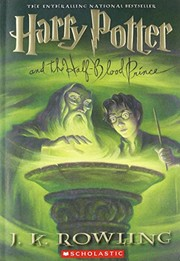

In [12]:
display(Image(url))

In [63]:
def getgenre(ISBN):
    url1= 'https://openlibrary.org/api/books?bibkeys=ISBN:{}&jscmd=data&format=json'.format(ISBN)
    response= requests.get(url1)
    return response



In [68]:
deita=getgenre("9780345453747").json()

In [72]:
deita

{'ISBN:9780345453747': {'publishers': [{'name': 'Del Rey'}],
  'pagination': 'xvi, 815 p. ;',
  'identifiers': {'openlibrary': ['OL17044900M'],
   'isbn_10': ['0345453743'],
   'librarything': ['7015245'],
   'goodreads': ['13']},
  'title': "The ultimate hitchhiker's guide to the galaxy",
  'url': "https://openlibrary.org/books/OL17044900M/The_ultimate_hitchhiker's_guide_to_the_galaxy",
  'number_of_pages': 815,
  'subjects': [{'url': 'https://openlibrary.org/subjects/english_humorous_stories',
    'name': 'English Humorous stories'},
   {'url': 'https://openlibrary.org/subjects/english_science_fiction',
    'name': 'English Science fiction'},
   {'url': 'https://openlibrary.org/subjects/fiction', 'name': 'Fiction'},
   {'url': 'https://openlibrary.org/subjects/humorous_stories,_english',
    'name': 'Humorous stories, English'},
   {'url': 'https://openlibrary.org/subjects/science_fiction,_english',
    'name': 'Science fiction, English'},
   {'url': 'https://openlibrary.org/subjects

In [78]:
loco=[]
subject=[]
for sub in deita["ISBN:9780345453747"]["subjects"]:
    subject.append(sub["name"])
loco.append(subject)
loco

[['English Humorous stories',
  'English Science fiction',
  'Fiction',
  'Humorous stories, English',
  'Science fiction, English',
  'Interplanetary voyages']]

In [58]:
import json
import requests

def getBooks(subject):
    url = 'http://openlibrary.org/subjects/{}.json'.format(subject)
    res = requests.get(url)
    return res


In [59]:
data= getBooks("drama").json()

In [60]:
data

{'subject_type': 'subject',
 'name': 'drama',
 'key': '/subjects/drama',
 'ebook_count': 7478,
 'works': [{'printdisabled': True,
   'cover_id': 8281954,
   'ia_collection': ['bplsctpbs',
    'university_of_alberta_libraries',
    'JaiGyan',
    'inlibrary',
    'lincolncollection',
    'americana',
    'cdl',
    'delawarecountydistrictlibrary',
    'brighamyounguniversityidaho',
    'robarts',
    'bplsceep',
    'audio_music',
    'universityofottawa',
    'unlockedrecordings',
    'additional_collections',
    'opensource_textbooks',
    'gutenberg',
    'prscr',
    'unclibraries',
    'library_of_congress',
    'cornell',
    'university_of_california_libraries',
    'oliverwendellholmeslibrary',
    'opensource',
    'family_history_library',
    'album_recordings',
    'europeanlibraries',
    'popularchinesebooks',
    'printdisabled',
    'digitallibraryindia',
    'bncfirenze',
    'microfilm',
    'librivoxaudio',
    'bostonpubliclibrary',
    'audio_bookspoetry',
    'chi

In [61]:
for book in data["works"]:
    print(book["title"])

Hamlet
Tempest
Romeo and Juliet
Le "Faust" de Goethe
Macbeth
The Works of Aristotle
Wuthering Heights
The Aeneid
King Lear
Julius Caesar
Merchant of Venice
Othello


In [15]:
import csv
from bs4 import BeautifulSoup as bs
import urllib
import os

In [19]:
def scrape_and_run(genre):
    # scrape on goodreads.com using desire genre type or key word
    # and save the titles and autors in a csv file
    page = requests.get("https://www.goodreads.com/shelf/show/" + genre)
    soup = bs(page.content, 'html.parser')
    titles = soup.find_all('a', class_='bookTitle')
    authors = soup.find_all('a', class_='authorName')


    image_dir = os.getcwd() + "/images/" + genre

    ## check if the desire genre path exists
    ## create a new one if it doesnt
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    with open(genre + '.csv', 'w') as csvfile:
        fieldnames = ['title', 'author']
        csv_write = csv.DictWriter(csvfile, fieldnames=fieldnames)
        books_save = 0

        for title, author in zip(titles, authors):

            try:
                ## single book page
                book_page = requests.get("https://www.goodreads.com" + title['href'])
                soup = bs(book_page.content, 'html.parser')
                # get image id
                image = soup.find('img', id='coverImage')

                title_name = title.get_text()

                save_dir = image_dir + "/" + title_name
                urllib.request.urlretrieve(image['src'], save_dir)

                csv_write.writerow({'title': title_name, 'author': author.get_text()})
                books_save += 1
                ## error handelling for long file names
            except OSError as exc:
                if exc.errno == 36:
                    print(exc)

        print("%d %s books saved." % (books_save, genre)) # books count feedback



if __name__ == '__main__':

    ## run ifinite till user tells you to stop
    ## to avoid having to compile again and again
    while True:
        genre = input("Enter the genre (or quit to stop): ").lower() # input case lowered
        if(genre == "quit"):
            break
        else:
            scrape_and_run(genre)

Enter the genre (or quit to stop): drama
50 drama books saved.


KeyboardInterrupt: 